# Load Dataset

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print(tabulate(df.head(10), headers = 'keys'))
print(df.shape)
print(df.info())

            age         sex          bmi           bp           s1           s2            s3           s4           s5           s6    target
--  -----------  ----------  -----------  -----------  -----------  -----------  ------------  -----------  -----------  -----------  --------
 0   0.0380759    0.0506801   0.0616962    0.0218724   -0.0442235   -0.0348208   -0.0434008    -0.00259226   0.0199075   -0.0176461        151
 1  -0.00188202  -0.0446416  -0.0514741   -0.0263275   -0.00844872  -0.0191633    0.0744116    -0.0394934   -0.0683315   -0.092204          75
 2   0.0852989    0.0506801   0.0444512   -0.00567042  -0.0455995   -0.0341945   -0.0323559    -0.00259226   0.00286131  -0.0259303        141
 3  -0.0890629   -0.0446416  -0.011595    -0.0366561    0.0121906    0.0249906   -0.0360376     0.0343089    0.0226877   -0.00936191       206
 4   0.00538306  -0.0446416  -0.0363847    0.0218724    0.00393485   0.0155961    0.00814208   -0.00259226  -0.0319876   -0.0466409        135

# EDA

In [3]:
import seaborn as sns

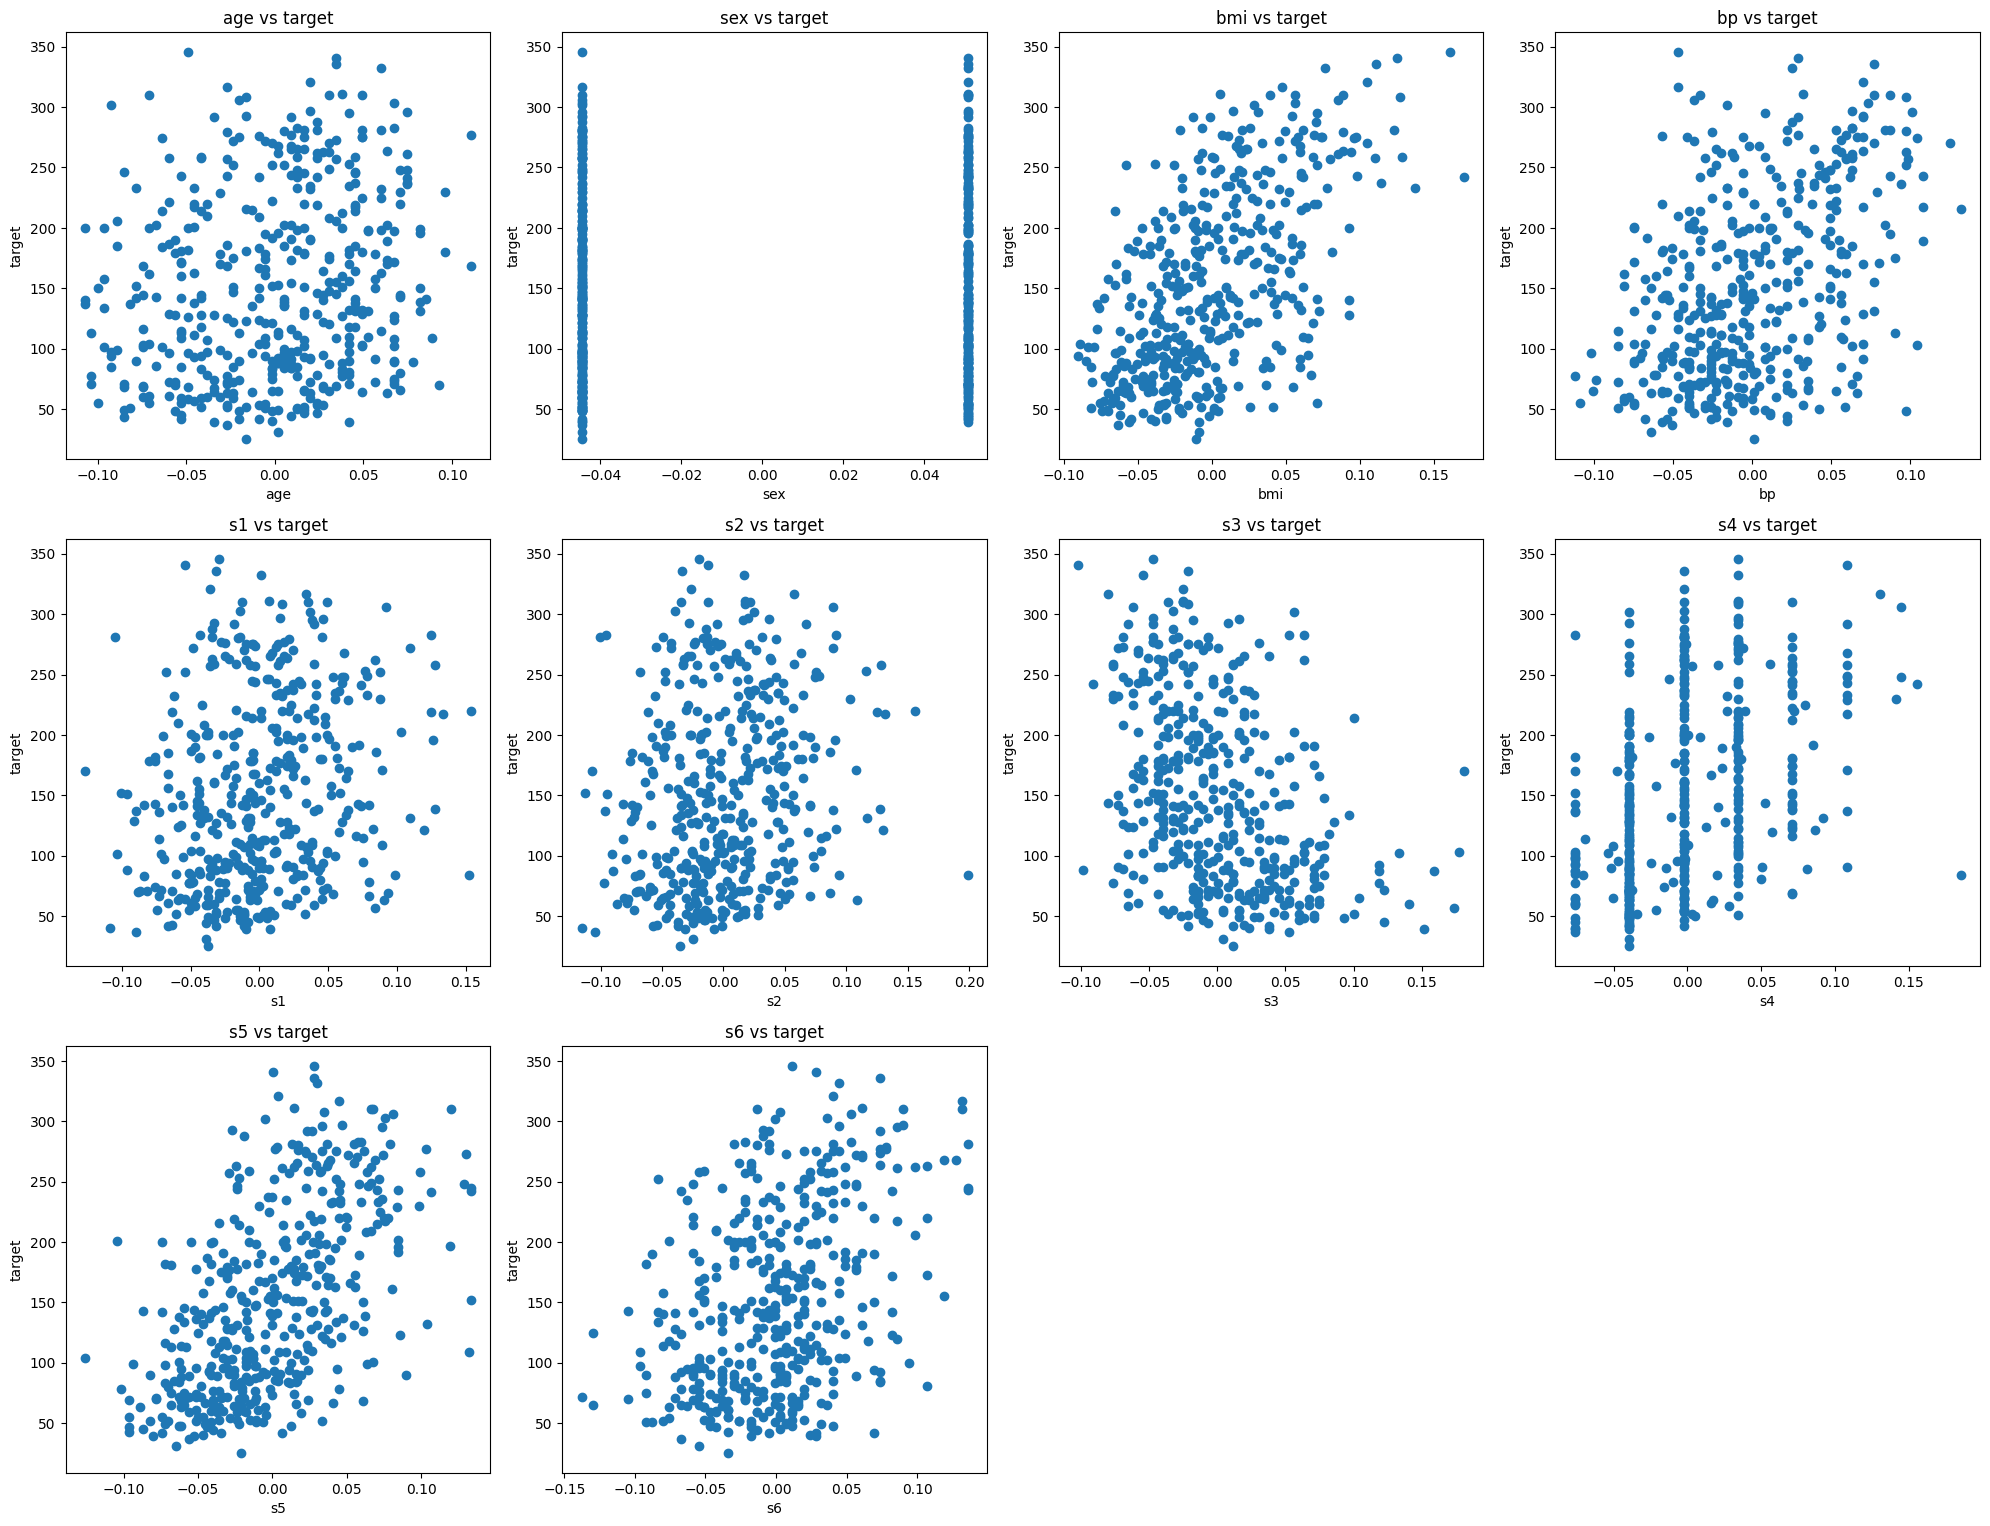

In [4]:
# Plot each feature against the target variable
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed

for i, feature in enumerate(diabetes.feature_names):
    plt.subplot(4, 4, i + 1)
    plt.scatter(df[feature], df['target'])
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(f'{feature} vs target')

plt.tight_layout()
plt.show()

In [5]:
correlation = df.corr()['target'].sort_values(ascending=False)
print(correlation)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


## linearity: from the scatter plot we can tell variable such as bmi, s5, bp, s4, s6, and s3 has a linear relationship with the target variable. In addition, the Pearson's Correlation test further supports our finding.

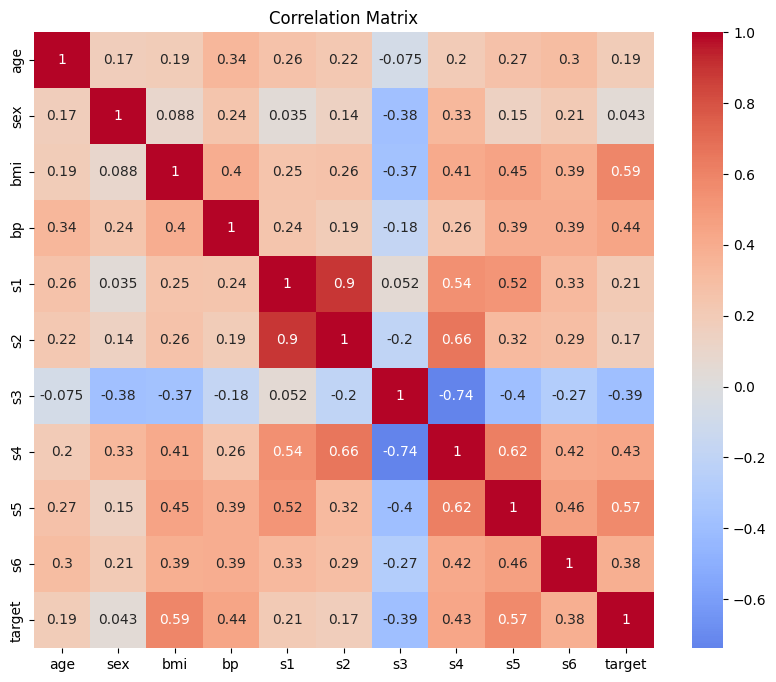

In [6]:
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Multicollinearity: from the correlation matrix we can see that variable s4 and s1 are highly correlate with other variables. 

<Figure size 2000x2000 with 0 Axes>

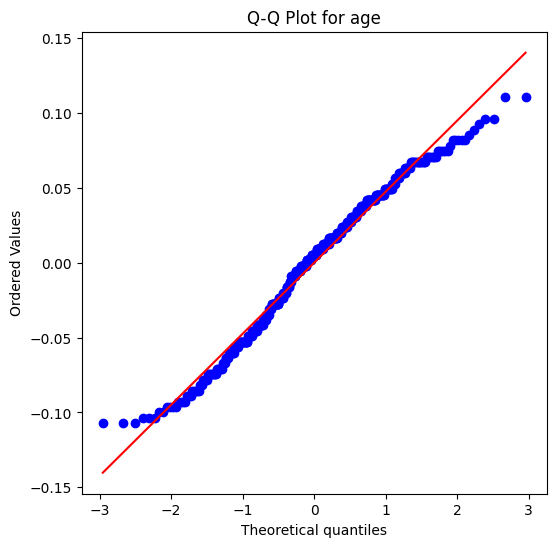

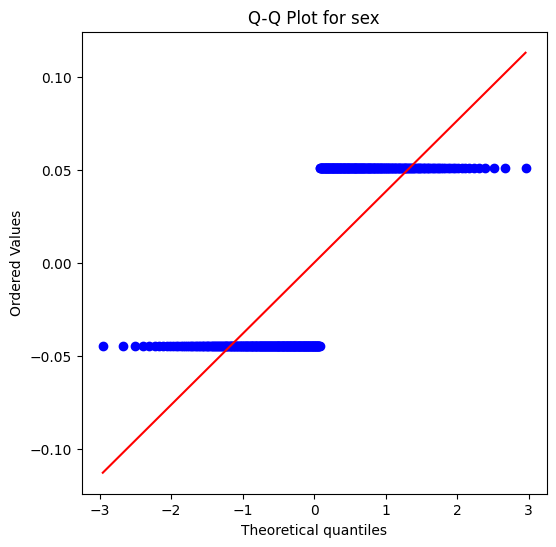

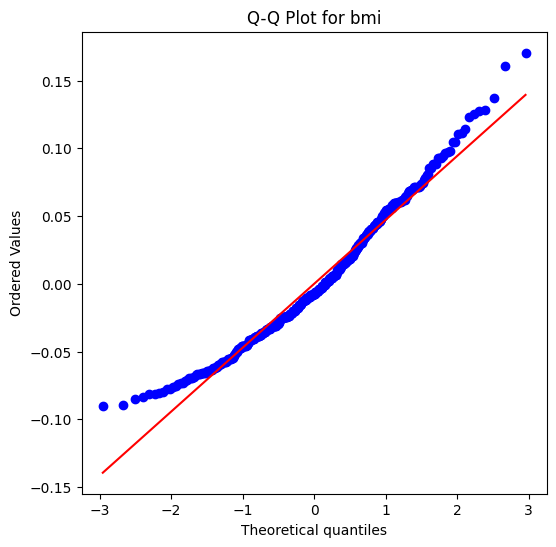

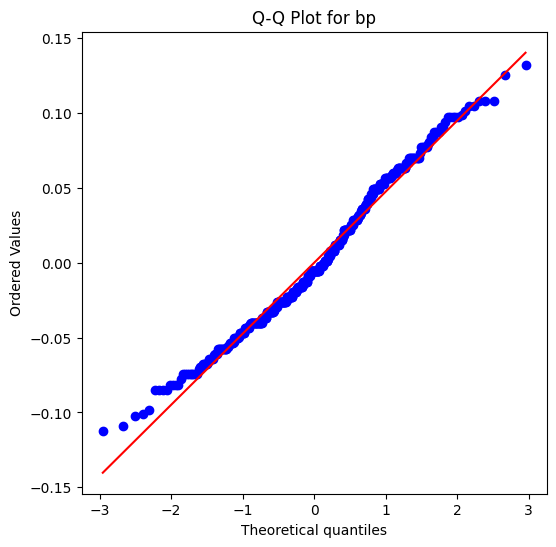

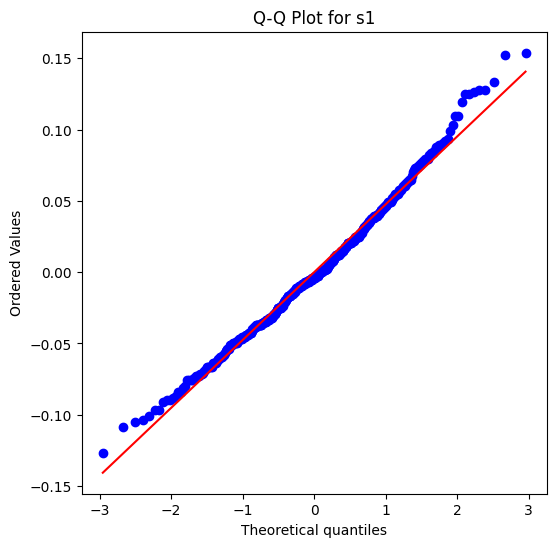

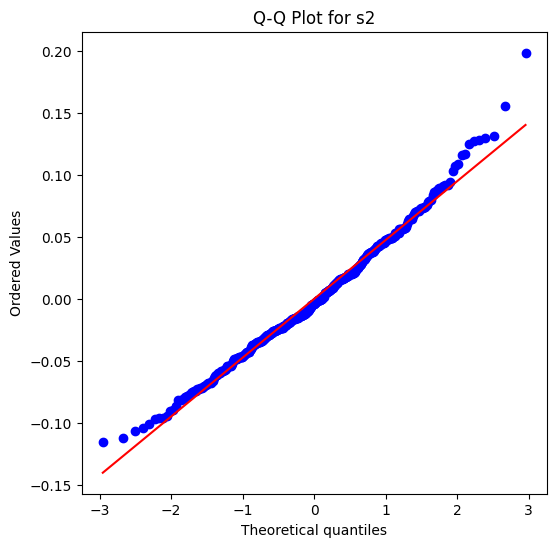

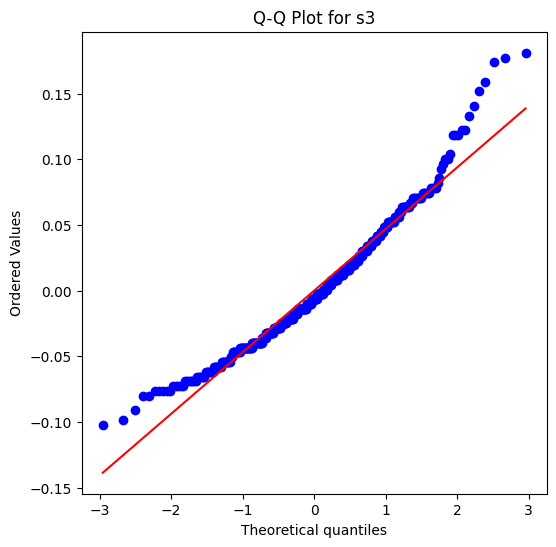

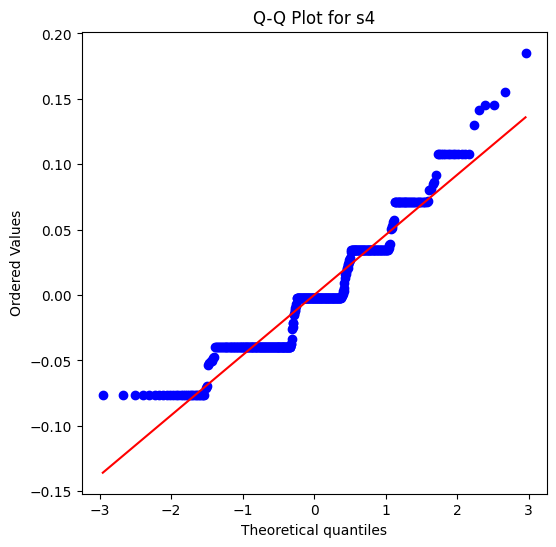

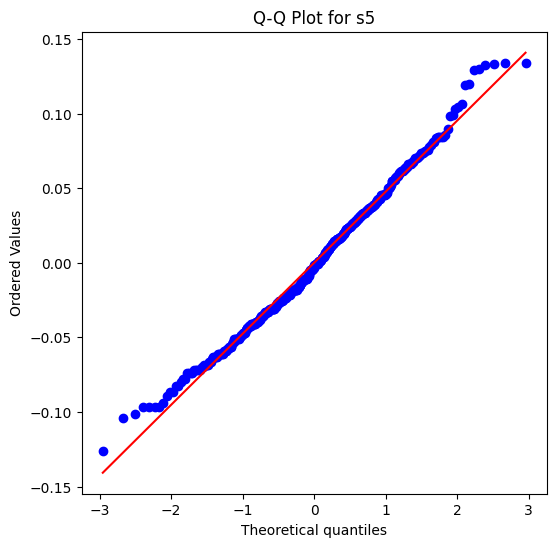

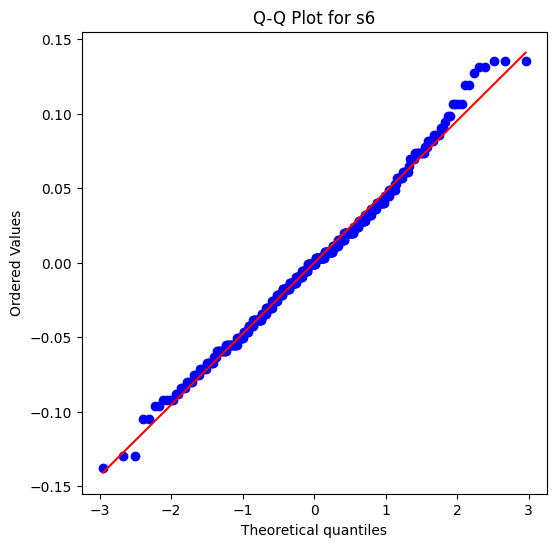

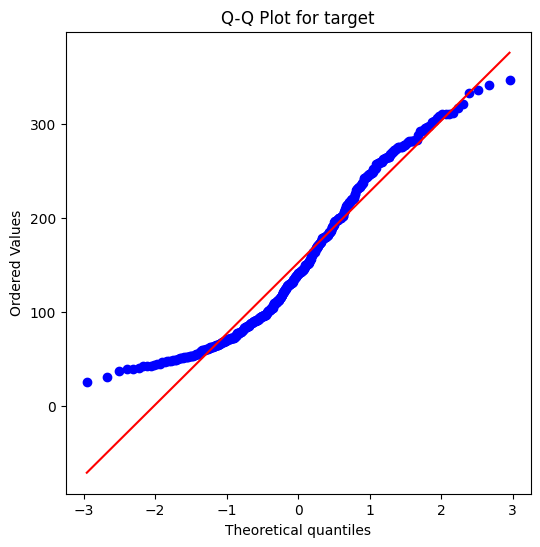

In [7]:
import scipy.stats as stats

plt.figure(figsize=(20, 20)) 
# Function to plot Q-Q plot
def plot_qq(data, feature_name):
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {feature_name}')
    plt.show()

# Plot Q-Q plots for each feature and the target variable
for feature in df.columns:
    plot_qq(df[feature], feature)


## Normality: as we can see from the Q-Q plot, variables such as s4, s3, and bmi are not normally distributed. 

In [8]:
#df = df.drop(['s4', 's1', 'sex'], axis = 1)
df['Intercept'] = 1
print(tabulate(df, headers = 'keys'))


             age         sex           bmi            bp            s1            s2            s3            s4            s5           s6    target    Intercept
---  -----------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -----------  --------  -----------
  0   0.0380759    0.0506801   0.0616962     0.0218724    -0.0442235    -0.0348208    -0.0434008    -0.00259226    0.0199075    -0.0176461        151            1
  1  -0.00188202  -0.0446416  -0.0514741    -0.0263275    -0.00844872   -0.0191633     0.0744116    -0.0394934    -0.0683315    -0.092204          75            1
  2   0.0852989    0.0506801   0.0444512    -0.00567042   -0.0455995    -0.0341945    -0.0323559    -0.00259226    0.00286131   -0.0259303        141            1
  3  -0.0890629   -0.0446416  -0.011595     -0.0366561     0.0121906     0.0249906    -0.0360376     0.0343089     0.0226877    -0.00936191       206            1
  4   0.00538306  -0.0

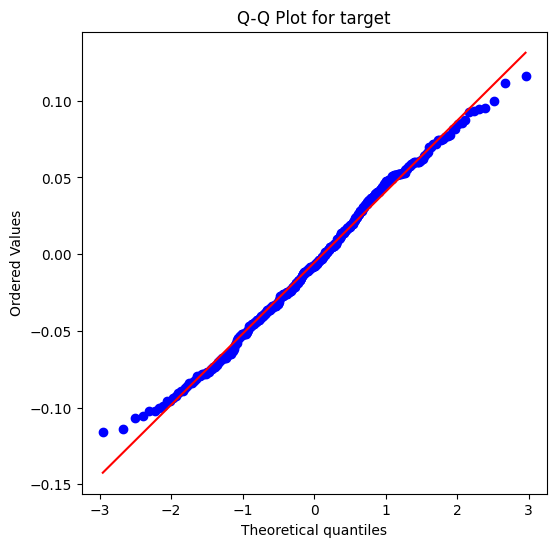

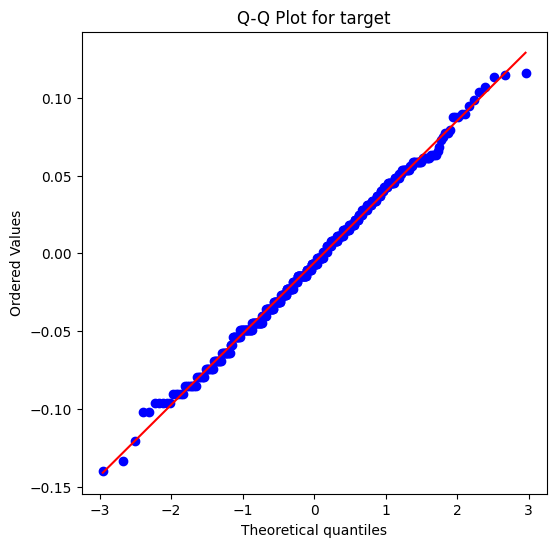

             age         sex           bmi            bp            s1            s2            s3            s4            s5           s6    target    Intercept
---  -----------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -----------  --------  -----------
  0   0.0380759    0.0506801   0.053072      0.0218724    -0.0442235    -0.0348208    -0.0492611    -0.00259226    0.0199075    -0.0176461        151            1
  1  -0.00188202  -0.0446416  -0.0590232    -0.0263275    -0.00844872   -0.0191633     0.061059     -0.0394934    -0.0683315    -0.092204          75            1
  2   0.0852989    0.0506801   0.0398267    -0.00567042   -0.0455995    -0.0341945    -0.0355295    -0.00259226    0.00286131   -0.0259303        141            1
  3  -0.0890629   -0.0446416  -0.0119468    -0.0366561     0.0121906     0.0249906    -0.0400084     0.0343089     0.0226877    -0.00936191       206            1
  4   0.00538306  -0.0

In [9]:
from scipy.stats import boxcox
df['bmi'], _ = boxcox(df['bmi'] + 1)
df['s3'], _ = boxcox(df['s3'] + 1)
plot_qq(df['bmi'], feature)
plot_qq(df['s3'], feature)
print(tabulate(df, headers = 'keys'))

## Note: We use Box-Cox Transformation on Variable bmi and s3 to fix their normality

# Fitting OLS

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

def ols_fit(X,y):
    XtX = np.dot(X.T, X)
    XtX_inv = np.linalg.inv(XtX)
    XtY = np.dot(X.T, y)
    weights = np.dot(XtX_inv, XtY)
    return weights

# Fit the model to the training data
weights = ols_fit(X_train, y_train)

# Make predictions on the test set
def ols_predict(X, weights):
    return np.dot(X, weights)

y_pred = ols_predict(X_test, weights)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the weights
print(f'Weights: {weights}')

# Calculate R-squared
def calculate_r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

r_squared = calculate_r_squared(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 2930.265834633748
Weights: [  21.88157712 -253.77762924  535.95851942  354.35224126 -706.51727903
  339.77718545   29.45867255  225.06948503  658.25090068   54.89889079
  154.42289108]
R-squared: 0.44692678244744943
